#### Import modules

In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd

#### Read states data file

In [2]:
states_adj = {}

with open(os.getcwd() + '/Data/usa-state-data.json', 'r') as state_json:
    states_adj = json.load(state_json)
    
len(states_adj)

51

In [3]:
# states_adj

#### Create states code and name maps

In [4]:
code_to_name, name_to_code = {}, {}

for code in states_adj:
    name = states_adj[code]['name']
    code_to_name[code] = name
    name_to_code[name] = code
    
code_to_name['MA'], name_to_code['Massachusetts']

('Massachusetts', 'MA')

#### Create network of states

In [5]:
ignore_states = ()

state_cons = []

for s in states_adj:
    if s not in ignore_states:
        for n in states_adj[s]['adjacent']:  # lists for AK and HI are empty, hence this loop is not run for them
            state_cons.append([s, n])

In [6]:
# state_cons

In [7]:
states_edge_pairs = pd.DataFrame(state_cons, columns = ['state1', 'state2'])
states_edge_pairs.head()

,state1,state2
0,AL,FL
1,AL,GA
2,AL,TN
3,AL,MS
4,AZ,NM


In [8]:
states_graph = nx.from_pandas_edgelist(states_edge_pairs, 'state1', 'state2')

In [9]:
states_graph['MA']

AtlasView({'CT': {}, 'NH': {}, 'VT': {}, 'NY': {}, 'RI': {}})

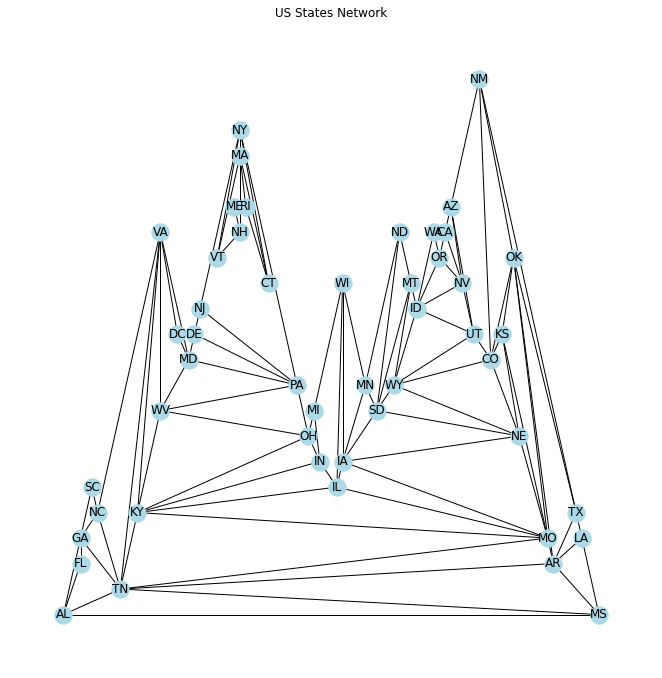

In [10]:
fig = plt.figure(figsize = (9, 9))
nx.draw_planar(states_graph, node_color = '#add8e6', with_labels = True)
plt.title('US States Network')
plt.show()
plt.close()